# Нейронные сети. Практика-1

### ДЗ - типичные ошибки
**Больше всего сложностей и вопросов:** 
- 2.3 (функция потерь кросс-энтропии)
- 3.3 (создание слоя НС с выхоом чрез softmax). 

Binary cross-entropy loss:

$$
BCE (y') = -y\log(y') - (1-y)\log(1-y'),
$$

где *y* - истинные, а *y'* - предсказанные значения

Т.к. выход последнего слоя сети - сигмоида, занчения можно интерпертеировать как вероятности определения соответствующего класса. Вспомним график сигмоиды:

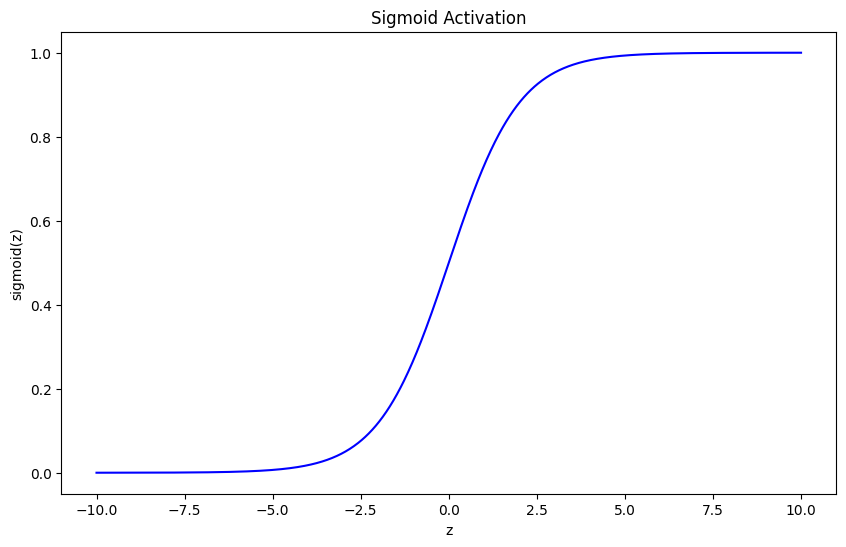

In [55]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
z = torch.linspace(-10, 10, 1000)
y = torch.sigmoid(z)

plt.figure
plt.plot(z, y, color='b')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Activation')
plt.show()

- $sigmoid(0) = 0.5$
- $sigmoid(z) > 0.5$    $\text{  }\forall\text{ }z > 0$
- $sigmoid(z) < 0.5$    $\text{  }\forall\text{ }z < 0$

**Можно использовать свойства сигмоиды как правило для классификации:**

- $sigmoid(z) > 0.5$ y_pred интрепретируется как класс `1`
- $sigmoid(z) < 0.5$ y_pred интрепретируется как класс `0`

Результат `sigmoid` $y'$ интерпретируем принадлежность элемента к классу `1`. Тогда вероятность принадлежности к классу `0` будет $1-y'$.

Функция ВСЕ

$$
J(y^{'}) = -y\log(y^{'}) - (1-y)\log(1-y{'})
$$

может быть разбита на две части и записана в виде условного оператора [0,1]:

\begin{equation}
J(y^{'})=\left\{\begin{array}{cc} -\log(y^{'}) & y=1\\ -\log(1-y{'}) & y=0 \end{array} \right. \label{eq2}
\end{equation} 

**Изобразим обе части 1 и 0.**, т.к. в случае сигмоиды результаты, подающиеся на BCE будут в пределах от 0 до 1.

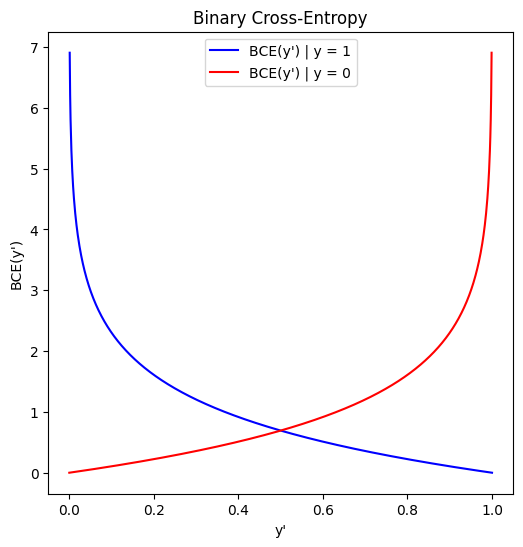

In [56]:
plt.rcParams["figure.figsize"] = (6, 6)
x = torch.linspace(0, 1, 1000)
y1 = -torch.log(x)
y0 = -torch.log(1-x)

plt.figure
plt.plot(x, y1, color='b', label="ВСЕ(y') | y = 1")
plt.plot(x, y0, color='r', label="ВСЕ(y') | y = 0")
plt.xlabel("y'")
plt.ylabel("ВСЕ(y')")
plt.legend(loc='upper center')
plt.title('Binary Cross-Entropy')
plt.show()

In [ ]:
def bce_loss(y_pred, y):
    loss = - y * torch.log(y_pred) - (1 - y)* torch.log(1 - y_pred)
    return loss.mean()

**Задача 3.3**: не вполне удачная формулировка: **Используйте матричное умножение* для вычисления выходных данных нейронной сети с одним слоем и активацией Sigmoid** Нужно ли создавать саму НС? Просто имитировать: умножение матриц и пропустить результат через сигмоиду? Сеть с одним слоем - это сколько нейронов? 

**Снижение оцнки за ДЗ:**
- Задание проигнорировано
- Ошибки в формулах
- Нет описания наблюдамых изменений (в задании требуется)

**Компенсация оценки:** выполнение дополнительных заданий

## Фреймворки глубокого обучения (DL frameworks)
Фреймворк - популярная в той или иной области разработки ПО библиотека, обычно разросшаяся в экосистему из нескольких смежных инструментов (специализированнных модулей).

### TensorFlow
Выпущен в 2015 г Google как проект с открытым кодом. Фреймворк развился от DistBelief - внутреннего проекта Google по нейросетевым вычислениям, но стал универсальным: есть как НС, так и "классические" методы машинного обучения.

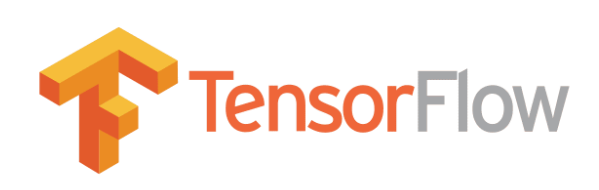

Достоинства <b><a href='https://www.tensorflow.org/' a>TensorFlow:</b>
- Удобство для освоения новичками, масса обучающих материалов
- Поддержка множества аппаратных решений: GPU, TPU
- Поддержка Edge AI платформ (в т.ч. Google Coral - нативно) с помощью фреймворка TensorFlow Lite
- Удобство интеграции с серверами Google Colab (основа - IPython Notebooks, та же что и у Jupyter)
- Полностью свободна для использования и развития (открытый код - open source)
- Большое открытое сообщество разработчиков
- TensorBoard - удобная надстройка для визуализации, отслеживания, логирования всех этапов обучения моделей

### PyTorch
Выпущен в 2017 г Meta AI (Facebook AI Research Lab)* , Основа PyTorch - библиотека LibTorch, написанная на Lua в 2016. LibTorch сразу привлекла внимание благодаря простоте использования (автоматичсеское создание графа вычислений - автодифференцирование), гибкости и масштабируемости и была переписана на python.

**запрещенная в РФ организация*

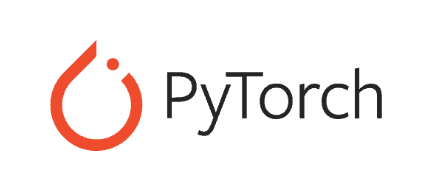

Достоинства <b><a href='https://pytorch.org/' a> PyTorch:</b>
- Autograd: система автоматического дифференцирования (при расчете градиентов). Удобсто использования - не нужно самому создавать и отслеживать граф вычислений производных для расчет градиентов
- Развитая экосистема специализированных по задачам бибилиотек инструментов (torchvision, torchaudio, torchtext, torch geometric и другие)
- Поддержка GPU (вычислений на видеокартах), поддержка Edge AI (отдельтный фреймворк PyTorch Mobile, TorchScript)
- Не просто переписана на python, но и соответствует парадигме, стилю и соглашениям языка
- Полностью свободна для использования и развития (открытый код - open source)
- Большое открытое сообщество разработчиков

### TF vs PT:
1. Скорость на Edge AI: TF Lite - максимальная (статьи). Но все зависит от многого и от конкретного случая.
2. Удобство освоения: РТ удобнее (субъективно). У TF есть <b><a href='https://keras.io/' a>Keras</b> - надстройка для автоматизации написаия скриптов с использованием высокоуровневых команд. Сейчас Keras поддерживает оба фреймворка.
3. Мнение: TF больше "промышленный стандарт", РТ скорее академическая среда (обучение, исследования).

## PyTorch: краткое введение

In [ ]:
import numpy as np
import torch

In [57]:
torch.zeros(3, 4) # 2-dimensional (rank-2) tensor of zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [58]:
torch.rand(2, 2, 2, 2) # Random rank-4 tensor

tensor([[[[0.8351, 0.6198],
          [0.0468, 0.5569]],

         [[0.1536, 0.8739],
          [0.6807, 0.8520]]],


        [[[0.6162, 0.8489],
          [0.9609, 0.6978]],

         [[0.3381, 0.4123],
          [0.5700, 0.0235]]]])

#### Совместимость Python / NumPy / Pytorch
Можно создавать тензоры как из обычных python-списков, так и из numpy-массивов, конвертировать тензоры в numpy-массивы.

In [59]:
# Simple Python list
python_list = [1, 2]

# Create a numpy array from python list
numpy_array = np.array(python_list)

# Create a torch Tensor from python list
tensor_from_list = torch.tensor(python_list)

# Create a torch Tensor from Numpy array
tensor_from_array = torch.tensor(numpy_array)

# Another way to create a torch Tensor from Numpy array (Share same storage)
tensor_from_array_v2 = torch.from_numpy(numpy_array)

# Convert torch tensor to numpy array
array_from_tensor = tensor_from_array.numpy()

print('List:   ', python_list)
print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_list)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)
print('Array:  ', array_from_tensor)

List:    [1, 2]
Array:   [1 2]
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2], dtype=torch.int32)
Tensor:  tensor([1, 2], dtype=torch.int32)
Array:   [1 2]


#### Разница `torch.Tensor` и `torch.from_numpy`

В рytorch все направленно на эффектиавность вычислений. Поэтому тут не копирутся данные если это возможно. И можно создать тензор из numpy-массива двумя путями: скопировав значения в другие области памяти и связав их с новым именем (объекты будут изменяться независимо) или скопировав лишь ссылки на значения для нового имени (объекты будут изменяться совместно).

In [60]:
numpy_array[0] = 10

print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)

Array:   [10  2]
Tensor:  tensor([1, 2], dtype=torch.int32)
Tensor:  tensor([10,  2], dtype=torch.int32)


#### Data types
Основное значение для операций алгоритмов глубокого обучения - float. Но pytorch поддерживает тензоры с различными типами данных, как и numpy, полный список поддерживаемых типов <b>[здесь](https://pytorch.org/docs/stable/tensors.html)</b>.

In [61]:
tensor = torch.zeros(2, 2)
print('Tensor with default type: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.float16)
print('Tensor with 16-bit float: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.int16)
print('Tensor with integers: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.bool)
print('Tensor with boolean data: ', tensor)

Tensor with default type:  tensor([[0., 0.],
        [0., 0.]])
Tensor with 16-bit float:  tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
Tensor with integers:  tensor([[0, 0],
        [0, 0]], dtype=torch.int16)
Tensor with boolean data:  tensor([[False, False],
        [False, False]])


### Autograd
Pytorch поддерживанет т.н. автодифференцирование (модуль **autograd**). Это включает отслеживание всех иземений данных в процесе прямого прохождения и вычисление градиентов. Можно включить или отключить автодифференцирование флагом `requires_grad` (для тензоров оно включено по умолчанию, для скаряных переменных - отключено).

In [62]:
a = torch.rand((3, 5), requires_grad=True)
print(a)
result = a * 5
print(result)

sum_result = result.sum()

# Вычисляем градиент
sum_result.backward()

print(a.grad)

tensor([[0.4466, 0.5023, 0.9788, 0.5345, 0.9958],
        [0.6529, 0.3360, 0.4803, 0.5645, 0.7952],
        [0.8942, 0.4098, 0.6344, 0.3202, 0.1126]], requires_grad=True)
tensor([[2.2330, 2.5115, 4.8938, 2.6725, 4.9791],
        [3.2647, 1.6798, 2.4017, 2.8223, 3.9761],
        [4.4711, 2.0489, 3.1718, 1.6012, 0.5630]], grad_fn=<MulBackward0>)
tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])


Pytorch автоматически вычислил градинеты (мы умножили входные данные на 5, градиент операции должен быть равен 5)

Если автодифференцирование не нужно - рекомендуется его отключать (экономия вычислений и памяти) одним из способов:

1. `detach` - создает копию тензора с отключенным градиентом, имя которой ссылается на ту же область памяти, потому некоторые изменения (resize_ / resize_as_ / set_ / transpose_) **НЕ** будут доступны.
2. `torch.no_grad()` - т.н. блок контекстного менеджера. Позволяет изолирвать набор операций (все что внутри тела блока) от вычислений градиента. Обычно применяется для работы с уже обученными сетями (т.е. вне процесса обучения, пример дальше).

In [63]:
a = torch.rand((3, 5), requires_grad=True)
detached_a = a.detach()
detached_result = detached_a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
sum_result = result.sum()
sum_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

In [64]:
detached_result = detached_result.sum()
detached_result.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [65]:
x = torch.rand((3,3), requires_grad=True)
print(x)

with torch.no_grad(): # контекстный менеджер - для операций в пределах блока (отступ) расчет градиентов отключен
    x = x ** 2
    
print(x.backward())

tensor([[0.1476, 0.6151, 0.4081],
        [0.2482, 0.6945, 0.2779],
        [0.0406, 0.8471, 0.0622]], requires_grad=True)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

### Лирическое отступление-1: Контекстный Менеджер (это удобно!)
Позволяет уменьшить количество дублированного кода, лучше читабельность, функционал тот же. Ключевое слово **with**, далее операция, после м.б. ключевое слово **as** и алиас (псевдоним для сокращения), заверщается конструкция двоеточием. Python даже позволяет **<a href='https://habr.com/ru/companies/auriga/articles/724030/' a>создавать собственные контекстные менеджеры**.

In [ ]:
# Запись в файл c использованием менеджера контекста

with open("demo_1.txt", "w") as file: #  with - ключевое слово, open - вызов операции (передан объект)
    # file. ...операции с файлом
    # еще операции, много кода...
    file.write("1!") # записываем в файл что-то
    
# конец блока контекста

### Лирическое отступление-2: Про Классы (тип class)...

Мир вокруг можно рассматривать как набор <b>объектов</b>: каждый объект обладает набором свойств и над ним можно совершать действия (или он сам совершает действия). Например, <b>кружка</b> имеет <b>цвет</b> и <b>размер</b>, её можно <b>поставить на стол</b>, из неё <b>можно пить</b>. Такой подход в разработке программ называется <b>объектно-ориентированным программированием (ООП)</b>. Наборы данных и действия над ними объединяются, например, у пользователя в системе есть <b>имя</b>, <b>email</b> и <b>баланс счёта</b>. и т.д.

<b>Класс (class)</b> в python (и других ЯП) - центральный объект в рамках парадигмы ООП которая поддерживается всеми современными ЯП. Все объекты в python это тоже классы - функция <b>dir()</b> дает возможноть посмотреть их методы. <b>Подробнее об ООП</b>: <b><a href='https://www.amazon.com/Python-Crash-Course-Hands-Project-Based/dp/1593276036' a>Erric Matthes</b> (для начинающих) и <b><a href='https://www.amazon.com/Python-3-Object-Oriented-Programming/dp/1849511268' a>Dusty Phillips - OOP in Python 3</b> (руководство с примерами на все случаи жизни). Вводная статья по ООП на <b><a href='https://realpython.com/python3-object-oriented-programming/' a>Real Python</b>, а также на [<b>Рroglib</b>](https://proglib.io/p/python-oop/), материал [<b>о композиции и наследовании</b>](https://realpython.com/inheritance-composition-python/), продвинутая статья [<b>о композиции и наследовании</b>](https://webdevblog.ru/nasledovanie-i-kompoziciya-rukovodstvo-po-oop-python/). Когда стоит применять [<b>классы</b>](https://devman.org/qna/41/gde-i-kogda-primenjajut-klassy-v-programmirovanii-na-pitone/)



In [66]:
# Ключевое слово class, за ним название класса - MyNeuralNetwork, скобки для аргументов и двоеточие
class MyNeuralNetwork():  
    pass # пустой класс - ничего не делает

Для имён классов традиционно (но не обязательно) используется стиль <b>CamelCase</b>: начала слов с большой буквы, без пробелов. Это позволяет легко отличать их от имён функций, которые пишутся в формате <b>snake_case</b> (нет больших букв, ниж. подчеркивание вместо пробела):

In [67]:
def my_neural_network():  
    pass  

<b>Объекты из классов</b>. Определение (объявление) класса - лишь шаблон, по которому создаются далее реальные объекты (также как объявление функции ничего не меняет, для произведений действий ее нужно вызывать). <b>Экземпляр класса (instance)</b> - новый объект, созданный по образу и подобию класса:

In [68]:
class MyNeuralNetwork():  
    pass

myNN = MyNeuralNetwork()
type(myNN)

__main__.MyNeuralNetwork

In [69]:
myNN2 = MyNeuralNetwork()
myNN == myNN2 # объекты созданы по одному классу: идентичны по содержанию, но разные по адресу памяти: изменются независимо

False

<b>Атрибуты и методы</b>. Добавим классу данные (=свойства, аттрибуты) и возможность с ними работать (методы = внутренние функции):
- Начальное значение аттрибутов (по умолчанию): метод инициализации ("конструктор класса") <b>\__\__init\__\__</b>. У класса с <b>\__\__init\__\__</b> при создании объекта по нему уже будут автоматически прописанны заданные значения. Это технический метод: имена таких методов начинаются и заканчивается двумя подчёркиваниями. Он получает первым специальный аргумент <b>self</b>. Это позволяет данному методу класса иметь доступ к другим собственным методам и атрибутам, менять свои атрибуты своими же методами, в нём могут выполняться любые операции. Оставшиеся аргументы он получает <b>обычно из вызова уже при создании</b>.
- Новый метод внутри класса - определяется как обычная функция, первым нередко также идет <b>self</b>. Это также дает данному методу класса доступ к изменнению собственных аттрибутов.

In [70]:
class MyNeuralNetwork():  
    
    def __init__(self, attr1, attr2): # конструктор класса
        self.attr1 = attr1 
        self.attr2 = attr2 # свойства (аттрибуты) класса

    def print_attr(self):  
        print("attribute 1:", self.attr1)
        print("attribute 2:", self.attr2)
           
myNN = MyNeuralNetwork(10, 15)  
myNN.attr1 = 10
myNN.attr2 = 15
  
myNN2 = MyNeuralNetwork(20, 30)
myNN2.attr1 = 20
myNN2.attr2 = 30  
  
# вывод :  
myNN.print_attr()
myNN2.print_attr()

attribute 1: 10
attribute 2: 15
attribute 1: 20
attribute 2: 30


In [71]:
myNN.attr1 # вызов аттрибута класса

10

In [72]:
myNN.attr2 = 1000 # изменение аттрибута класса
myNN.attr2

1000

Если при инициализации класса не передать первым аргументом self:

In [74]:
class Check:
    def __init__(self): #self это соглашение, лучше его использовать
        print("This is Constructor")

object = Check()

This is Constructor


In [75]:
class Circle: 
    def __init__(self, radius): 
        self.radius = radius 

    def area(self): 
        return 3.14 * self.radius ** 2 

# Создание экземпляра класса Circle 
circle = Circle(5) 
circle.area()

78.5

### Примеры использования классов
Основная задача классов — объединять данные и действия над ними. Эти же задачи можно решать обычными функциями и коллекциями (словарями/списками). Но для многих задач <b>ООП является лучшим инструментом</b>. В каких ситуациях переходить от простых функций к классам?
1. Отслеживание состояния. Одно из классических предписаний для классов — множество объектов, у которых есть меняющиеся состояния. Например, есть база клиентов с основной информацией, в реальном времени нам приходит информация о покупках.
2. Комбинация операций. Классы полезны, если регулярно выполняется <b>одна и та же</b> последовательность функций. Можно упаковать их в класс и в дальнейшем сразу получать результат по загруженным данным. У нас есть численные данные из разных источников, если они в виде строк, то нужно привести их к числам, а пропуски заполнить значениями.
3. Класс-обёртка. Классы можно использовать тогда, когда у вас есть повторяющейся процесс со сложной конфигурацией. Создание класса-обёртки, сведёт процесс к одному-двум методам. Например, надо сделать обработку данных и в конце каждого дня сохранить результат в архив каждого дня в отдельном файле.
4. Импорт и организация кода. Классы, как и библиотечные функции, можно импортировать в другие программы. Для этого нужно положить класс в отдельный файл в корне проекта и использовать ключевое слово <b>import</b>. Пишем <b>from</b> [имя файла без .py] <b>import</b> [имя класса]. Имя файла должно начинаться с буквы и не совпадать с именами библиотечных модулей. Если файлов с классами много, их можно складывать в папки, предварительно положив туда пустой файл <b>\_\_init\_\_.py</b>, это требование Python.

<b>Резюме по классам:</b>
- Класс описывает объект через его атрибуты и методы.
- Атрибут объекта — это его переменная.
- Метод объекта — это его функция.
- Метод объекта автоматически получает первым аргументом сам объект под именем self (не является ключевым словом в python). Это имя параметра в методах экземпляра для ссылки на сам экземпляр.
- Мы можем создавать множество экземпляров одного класса и значение их атрибутов независимы друг от друга.
- Если определить метод <b>\__\__init\__\__</b>, то он будет выполняться при создании объекта.
- Всё это позволяет компактно увязывать данные и логику внутри объекта.

## "Конструктор" нейросетей: nn module
Модуль позволяет собирать различные архитектуры НС из большого разнообразия готовых слоев нейронов, которые отличаются типом нейронов (их функцией), размерами (число нейронов), связностью (число связей с предыдущим и следующим слоем) и другими особенностями. Кажды слой в НС имеет свою специальную функцию. Общие правила "конструирования" НС:
- Почти всегда порядок слоев важен. 
- Если размерность тензора данных (число входов первого слоя; по умолчанию считатется что 1 нейрон = 1 вход) на выходе слоя после преобразований в нем изменяется, то она должна соответствовать входу следующего слоя. Cледующий слой подбираются с учетом размерности выходного тензора.

In [76]:
import torch.nn as nn
print(dir(nn)) # в составе pytorch большое разнообразие слоев!

['AdaptiveAvgPool1d', 'AdaptiveAvgPool2d', 'AdaptiveAvgPool3d', 'AdaptiveLogSoftmaxWithLoss', 'AdaptiveMaxPool1d', 'AdaptiveMaxPool2d', 'AdaptiveMaxPool3d', 'AlphaDropout', 'AvgPool1d', 'AvgPool2d', 'AvgPool3d', 'BCELoss', 'BCEWithLogitsLoss', 'BatchNorm1d', 'BatchNorm2d', 'BatchNorm3d', 'Bilinear', 'CELU', 'CTCLoss', 'ChannelShuffle', 'ConstantPad1d', 'ConstantPad2d', 'ConstantPad3d', 'Container', 'Conv1d', 'Conv2d', 'Conv3d', 'ConvTranspose1d', 'ConvTranspose2d', 'ConvTranspose3d', 'CosineEmbeddingLoss', 'CosineSimilarity', 'CrossEntropyLoss', 'CrossMapLRN2d', 'DataParallel', 'Dropout', 'Dropout1d', 'Dropout2d', 'Dropout3d', 'ELU', 'Embedding', 'EmbeddingBag', 'FeatureAlphaDropout', 'Flatten', 'Fold', 'FractionalMaxPool2d', 'FractionalMaxPool3d', 'GELU', 'GLU', 'GRU', 'GRUCell', 'GaussianNLLLoss', 'GroupNorm', 'Hardshrink', 'Hardsigmoid', 'Hardswish', 'Hardtanh', 'HingeEmbeddingLoss', 'HuberLoss', 'Identity', 'InstanceNorm1d', 'InstanceNorm2d', 'InstanceNorm3d', 'KLDivLoss', 'L1Loss'

## Модель простого MLP (multi-layer perceptron)

Модель полносвязной НС (MLP) с ReLU-активацией. Три слоя (один скрытый). Задача: обучить сеть предсказывать значения y по x, минимизируя кросс-энтропию. Реализация модели - пользовательский класс, который наследует (получает доступ) к методам родительского класса (superclass, в данном случае это <b>torch.nn</b>) - для этого при создании класса нужно передать в конструктор специальную команду ```super().__init__()```. Не забудьте передать при объявлении самого класса имя суперкласса ```torch.nn.Module``` как аргумент, иначе python не поймет от чего наследовать методы для создаваемого класса.

Создаем простой MLP (multi-layer perceptorn) и нам нужны нсколько типов слоев:
- Линейный (полносвязный): <b>nn.Linear()</b>
- Слой активации, пропускает полученные данные через функцию ReLU: <b>nn.ReLU()</b>
- Слой-последовательность - сам по себе ничего не делает, контейнер (туда можно передать другие слои, которые выстроятся в последовательность для преобразований):
<b>nn.Sequential()</b>

### Задача: клссификация изображений MNIST
<b>MNIST</b> - большой датасет оцифрованных изображений рукописных цифр от 0 до 9 (т.е. 10 классов). Все изображения в оттенках серого, имеют размер 28х28 пискелей. Обучающая выборка соджержит 60000 изображений, валидационная - 10000. MNIST ранее был бенчмарком, с появлением ImageNet его роль скорее учебная, эксперименты с простыми архитектурами.

<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w2_Mnist.png" width=650>

Модуль <b><a href='https://pytorch.org/vision/main/datasets.html' a>datasets</b> в составе пакета torchvision (пакет по задачам компьютерного зрения из экосистемы pytorch) содержит множестово датасетов для различных задач. Там же есть и MNIST. Все датасеты можно загрузить командами из самого pytorch, они сразу будут реобразованы в тензоры, необходимые для работы в pytorch. Данные достаточно загрузить однажды - далее загрузчик проверяет их наличие в директории python-скрипта.

#### Импортируем необходимые модули

In [78]:
import torch.nn as nn
import torch.optim as optim
import torch

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

torch.manual_seed(0) # фиксируем генератор случаных чисел константой - для воспроизаоимости результатов
print(dir(datasets)) # список датасетов, доступных для скачивания и использования прямо в pytoch

['CIFAR10', 'CIFAR100', 'CLEVRClassification', 'CREStereo', 'Caltech101', 'Caltech256', 'CarlaStereo', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'Country211', 'DTD', 'DatasetFolder', 'EMNIST', 'ETH3DStereo', 'EuroSAT', 'FER2013', 'FGVCAircraft', 'FakeData', 'FallingThingsStereo', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'Flowers102', 'FlyingChairs', 'FlyingThings3D', 'Food101', 'GTSRB', 'HD1K', 'HMDB51', 'INaturalist', 'ImageFolder', 'ImageNet', 'InStereo2k', 'KMNIST', 'Kinetics', 'Kitti', 'Kitti2012Stereo', 'Kitti2015Stereo', 'KittiFlow', 'LFWPairs', 'LFWPeople', 'LSUN', 'LSUNClass', 'MNIST', 'Middlebury2014Stereo', 'MovingMNIST', 'Omniglot', 'OxfordIIITPet', 'PCAM', 'PhotoTour', 'Places365', 'QMNIST', 'RenderedSST2', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SUN397', 'SVHN', 'SceneFlowStereo', 'Sintel', 'SintelStereo', 'StanfordCars', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace', '__all__', '__builtins__', '__cached__', '__doc__', '_

In [79]:
# Загружаем обучающую выборку
train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

# Загружаем валиадционную (проверочную) выборку
validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

### Обучающая (тренировочная - train) и проверочная (валидационная  - validation) выборки
<b>Аналогия с обучением у людей:</b> как проверить знание учеников в классе (группе)? Дать задание. Какое задание? Если дать то же самое, на которых они обучались - они ожидаемо покажут отличные результаты. Чтобы реально проверить эффективность обучения нужно дать похожие (до некторой степени) , но не абсолютно те же самые задачи. Проверочная выборка - данные которые сеть "не видела" в процесе обучения.
- Плохо обуенная сеть: "двоечник" - ничего не знает и не понимает
- Слишком хорошо обученная (переобученная) сеть: "отличник-зубрила" - все выучил, не особо задумываясь
- Хорошо обученная сеть: "между 4 и 5" - хорошие занания и понимание, которое позволяет делать <b>обобщения</b>

### Батчи данных (batches)
Многие современные алгоритмы оптимизации в составе пакета ```torch.optim``` основаны на эффективном алгоритме стохастического градиентного спуска (stochastic gradient descent - SGD). Суть алгоритма: в из обучающей выборки случайным образом берутся данные  порциями небольшого объема - батчи, градиенты считаются и веса обновляются именно по результатм оценки батчей.

Размер батча - один из важнейших настраиваемых вручную параметров (т.н. гиперпараметры). Какой батч взять - решает DL-инженер, это часто предмет экспериментов. В данном случае хорошим вариантом будет 32 или 64 (принято брать батчи степени 2, но не обязательно). Большая RAM (или VRAM - видеопамять GPU) позволяет работать с большими батчами. Слишком большой батч часто бывает причиной ```out of memory error```.

`DataLoader` в составе pytorch - специальный класс-загрузчик данных уже непосредственно в НС. Позволяет извлекать и исследовать батчи, на котороых учится НС. Два загрузчика: для обучающей и для валидационной выборки (оба создаются по классу ```DataLoader```). Для ```train_loader``` параметр ```shuffle=True``` - при загрузке все образцы данных случайно перемешиваются - т.к. оригинальные данные м.б. как-то упорядочены (например, сперва иду 1-цы, потом 2-ки и т.д.), что негативно повлияет на процесс обучения (loss вычисляется по конкретному батчу). Перемешивать проверочную выборку нет необходимости.

In [ ]:
# Batch size : сколько случайно взятых образцов из обучающей выборки используются для расчета градиентов
batch_size = 32

# Train DataLoader 
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)
# Validation DataLoader 
validation_loader = DataLoader(dataset=validation_dataset, 
                               batch_size=batch_size, 
                               shuffle=False)

# Если сть доступ к видеокарте - расчеты больших сетей лучше делать на ней

### Архитектура модели
MLP - полносвязная сеть, у которой тут 4 слоя:
- Входной слой: 784 нейрона (28 * 28, каждое изображение будет преобразованно в 2D-тнезор, а потом в 1D-тензор (вектор) и подано на вход.
- Два скрытых слоя по 512 нейронов
- Выходной слой - 10 нейронов (по числу классов данных)

<img src="https://www.learnopencv.com/wp-content/uploads/2017/10/mlp-mnist-schematic.jpg" width=700>

<b>Число выходных параметров каждого слоя должен соответствовать числу входных для следующего:</b>

In [82]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__() # наследование метода суперкласса (родительского класса)

        # Sequential слой - контейнер для цепи преобразующих слоев
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.model(x)

<b>Важно:</b> для классификации выходной слой должен иметь softmax-активацию, но тут ее нет, остается "голый" выход линейного слоя. Мы будем использовать ```nn.CrossEntropyLoss``` далее в процессе обучения - она уже содержит в себе nn.LogSoftMax (логит - логарифм функции softmax) и ```nn.NLLLoss``` (Negative Log Likelihood Loss).
Однако в процессе прмиенения (инференс - inference) уже обученной сети добавим к выходу функцию softmax в виде ```nn.functional.softmax``` для преобразования "сырых" знаений слоя в вероятности предсказанных классов.

оптимизаторы

### Обучение сети

Процедура обучения вклчает следующеи шаги:

1. Выбираются батчи в загрузчике обучающей выборки
2. Данные преобразуются к размерности для подасчи на входной слой сети (тензор 28х28 --> вектор 784)
3. Данные подаются на входной слой сети
4. По предсказанным значениям (```y_pred```) и истинным значениям (```y```) вычисляется функция потерь (```cross entropy loss```)
5. Обнуляется градиент, вычисленный от пердыдущего батча: ```optimizer.zero_grad```
6. Вычисляется градиент текущего батча ```oss.backward```
7. Комнадой ```optimizer.step``` обновляются веса НС

### Процедура обучнеия сети в виде функции
В цикле используется ранее созданный загрузчик именно обучающей выборки ```train_loader```

In [80]:
def train():
    model.train() # режим обучения (важен для некоторы слоев - batchnorm, dropout и др.)
    running_loss = 0
    running_correct = 0

    for (x_train, y_train) in train_loader:
        
        # Прямое прохождение: 28*28 --> 1*784 вектор
        x_train = x_train.view(x_train.shape[0], -1)
        
        # Расчет y_pred по y, прошедших в модель
        y = model(x_train)
      
        # Вычисление функции потерь
        loss = loss_function(y, y_train)
        running_loss += loss.item()

        # Вычисление метрики точности
        y_pred = y.argmax(dim=1)
        correct = torch.sum(y_pred==y_train)
        running_correct += correct

        # Обнуление градиентов
        optimizer.zero_grad()

        # вычисление новых для текущего батча
        loss.backward()

        # обновление весов модели
        optimizer.step()
  
    return running_loss/len(train_loader), running_correct.item()/len(train_loader.dataset)

### Применение обученной сети (инференс - inference)
В цикле используется ранее созданный загрузчик проверочной выборки ```validation__loader```. Процедура применения обуенной сети не требует расчета градиентов и обновления весов - потому даже большую обученную сеть можно пробовать применять без GPU, это намного меньше по вычислениям чем обучение сети. обучение - самый вычислоительно тяжелый этап (все как у людей!)

In [81]:
def val():
    model.eval() # переводим сеть в режим оценки (некоторые слои - batchnorm, dropout и др. корректно работают)
    running_loss = 0
    running_correct = 0
    with torch.no_grad(): # контекстный менеджер - для операций в пределах блока (отступ) расчет градиентов отключен
        for (x_val, y_val) in validation_loader:

            # Прямое прохождение: 28*28 --> 1*784 вектор
            x_val = x_val.view(x_val.shape[0], -1)

            # Вычислоение "голых" значений на последнем слое (пропуск данных через сеть)
            y = model(x_val)

            # Перевод полуенных значений в вероятности с помощью softmax
            prob = nn.functional.softmax(y, dim=1)

            # Вычисление Accuracy (точность)
            y_pred = prob.argmax(dim=1)
            correct = torch.sum(y_pred==y_val)
            running_correct += correct

            # Вычисление функции потерь
            loss = loss_function(y, y_val)
            running_loss += loss.item()
      
    return running_loss/len(validation_loader), running_correct.item()/len(validation_loader.dataset)

### Главный скрипт
Главный скрипт будет вызывать выше определенные функции и параметры, создавая общую логику работы проекта.

<b>Гиперпараметры</b> - настраиваемые инженером параметры сети и процесса обучения. Для больших и сложных архитектур параметры обычно собраны в отдельные конфиг-файлы, перед запуском обучения читаются оттуда.
Если вся обучающая выборка 3200 изображений, то при батче 32 будет 100 батчей. Эпоха: через сеть прошло 100 батчей. Но т.к. батчи берутся случаным образом, некоторые элементы попадут в течение эпохи несколько раз, а некоторые вообше не попадут./

In [83]:
# создаем экземпляр класса (модель НС)
model = MLP()
print(model)

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [85]:
# Число эпох (подлных циклов прогона через сеть всех данных)
num_epochs = 20 

# Функция потерь - кросс-энтропия
loss_function = nn.CrossEntropyLoss()

# Оптимайзер - SGD, learning rate of 0.1.
optimizer = optim.SGD(model.parameters(), lr=1e-2) 

In [87]:
# пустые списки для записи получаемых значений
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

In [88]:
# Main script
print("Starting Training...")
for ep in range(num_epochs):
    train_loss, train_acc = train()
    val_loss, val_acc = val()
    print(f"Epoch: {ep}, Train Loss = {train_loss:.3f}, Train Acc = {train_acc:.3f} , Val Loss = {val_loss:.3f}, Val Acc = {val_acc:.3f}")
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

Starting Training...
Epoch: 0, Train Loss = 1.019, Train Acc = 0.739 , Val Loss = 0.397, Val Acc = 0.888
Epoch: 1, Train Loss = 0.355, Train Acc = 0.899 , Val Loss = 0.299, Val Acc = 0.915
Epoch: 2, Train Loss = 0.293, Train Acc = 0.916 , Val Loss = 0.259, Val Acc = 0.926
Epoch: 3, Train Loss = 0.255, Train Acc = 0.927 , Val Loss = 0.236, Val Acc = 0.931
Epoch: 4, Train Loss = 0.225, Train Acc = 0.935 , Val Loss = 0.205, Val Acc = 0.941
Epoch: 5, Train Loss = 0.199, Train Acc = 0.944 , Val Loss = 0.186, Val Acc = 0.946
Epoch: 6, Train Loss = 0.177, Train Acc = 0.949 , Val Loss = 0.167, Val Acc = 0.951
Epoch: 7, Train Loss = 0.160, Train Acc = 0.955 , Val Loss = 0.151, Val Acc = 0.956
Epoch: 8, Train Loss = 0.145, Train Acc = 0.959 , Val Loss = 0.141, Val Acc = 0.957
Epoch: 9, Train Loss = 0.131, Train Acc = 0.963 , Val Loss = 0.130, Val Acc = 0.961
Epoch: 10, Train Loss = 0.120, Train Acc = 0.966 , Val Loss = 0.121, Val Acc = 0.963
Epoch: 11, Train Loss = 0.110, Train Acc = 0.969 , Val

### Визуализация результатов

Text(0.5, 1.0, 'Accuracy Curve')

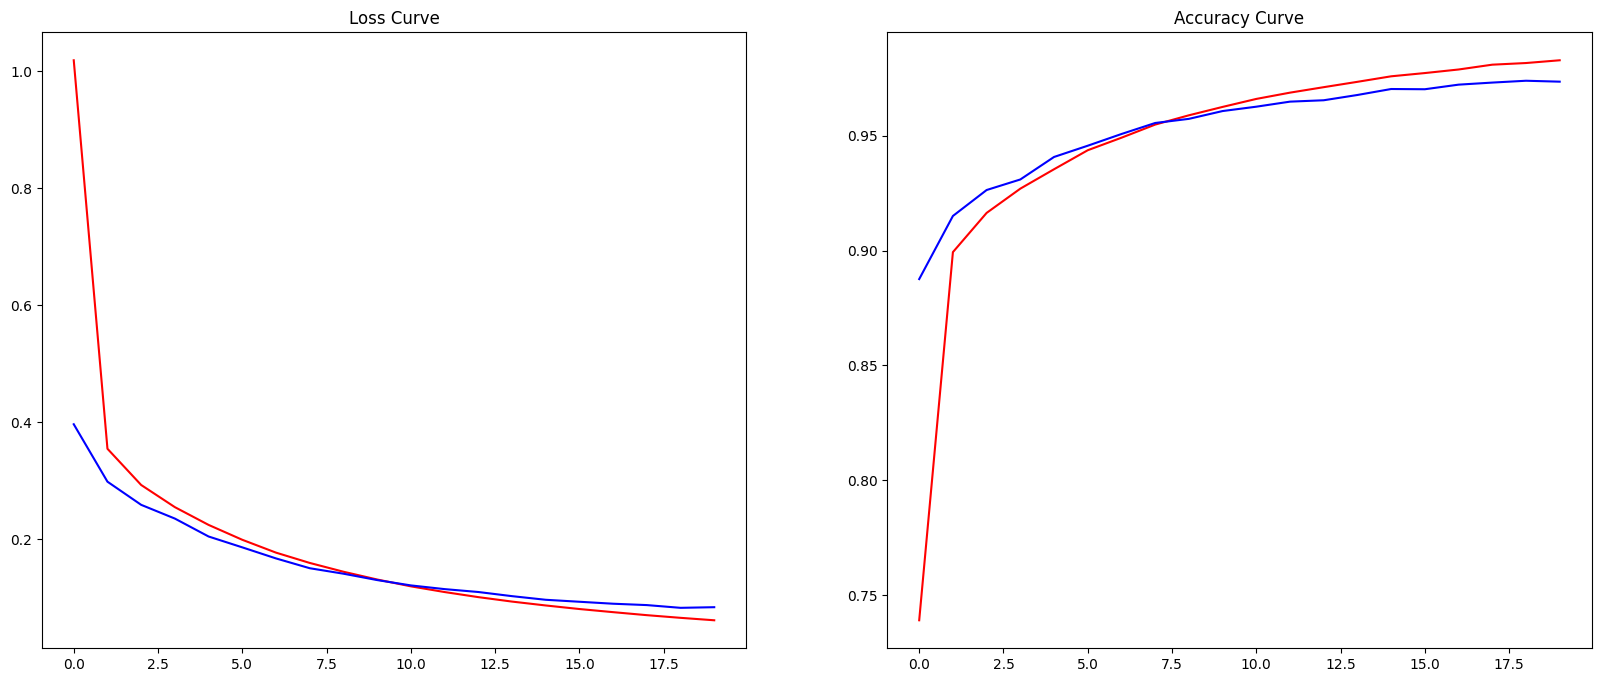

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[20,8])
plt.subplot(121)
plt.plot(train_loss_history,'r')
plt.plot(val_loss_history,'b')
plt.title("Loss Curve")

plt.subplot(122)
plt.plot(train_acc_history,'r')
plt.plot(val_acc_history,'b')
plt.title("Accuracy Curve")

### Примененрие сети (инференс)
Берем батч из загрузчика проверочной выборки, выбираем одно изображение (по индексам), пропускаем через сеть, смотрим результат, сравниваем в предсказанным, делаем вывод.

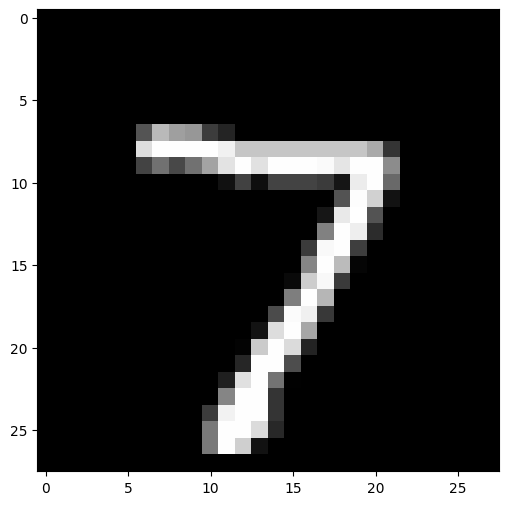

In [91]:
images, labels = next(iter(validation_loader)) # iter - т.н. генератор, может передаваться в метод next
plt.imshow(images[0][0],'gray')

In [94]:
images.resize_(images.shape[0], 1, 784)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])

In [95]:
score = model(images[0,:])
score

tensor([[ -0.3065,  -3.3124,   3.1313,   5.6112,  -4.9800,  -0.1795, -12.9820,
          12.4337,   0.7710,   2.1635]], grad_fn=<AddmmBackward0>)

In [96]:
prob = nn.functional.softmax(score[0], dim=0)
prob

tensor([2.9271e-06, 1.4487e-07, 9.1084e-05, 1.0876e-03, 2.7338e-08, 3.3235e-06,
        9.1531e-12, 9.9877e-01, 8.5980e-06, 3.4606e-05],
       grad_fn=<SoftmaxBackward0>)

In [97]:
y_pred =  prob.argmax()
print("Predicted class {} with probability {}".format(y_pred, prob[y_pred]))

Predicted class 7 with probability 0.998771607875824
